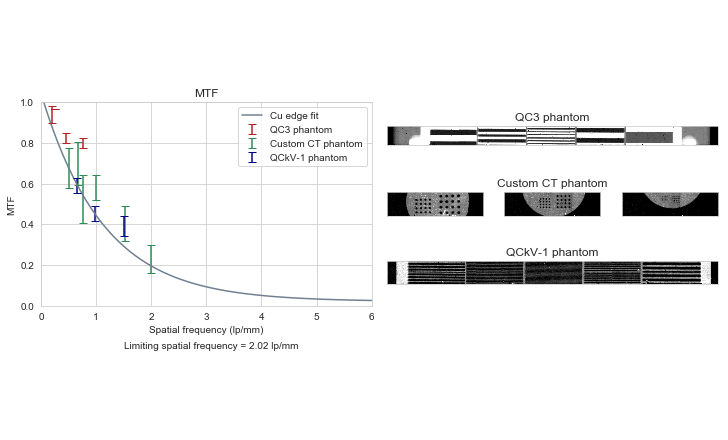

<Figure size 432x288 with 0 Axes>

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\AAPM21'
mtf_res = np.load(directory + r'\Radiographs\Two\resolution_piece_40kVp_analyzed\mtf.npy')
mtf_kv = np.load(directory + r'\Radiographs\Two\Stationary_kV_analyzed\phantom_scan\mtf.npy')
mtf_mv = np.load(directory + r'\Radiographs\Two\Stationary_MV_analyzed\phantom_scan\mtf.npy')

mtf_edge = np.load(directory + r'\ESF\mtf_edge.npy')

kv = np.load(directory + r'\Radiographs\Two\Stationary_kV_analyzed\phantom_scan\Data\data_corr.npy')
mv = np.load(directory + r'\Radiographs\Two\Stationary_MV_analyzed\phantom_scan\Data\data_corr.npy')
ct_large = np.load(directory + r'\Radiographs\Two\resolution_piece_40kVp_analyzed\large\Data\data_corr.npy')
ct_mid = np.load(directory + r'\Radiographs\Two\resolution_piece_40kVp_analyzed\middle\Data\data_corr.npy')
ct_small = np.load(directory + r'\Radiographs\Two\resolution_piece_40kVp_analyzed\small_1\Data\data_corr.npy')

# Find limit
idx = np.abs(mtf_edge[1] - 0.2).argmin()
lim = mtf_edge[0][idx]

widths = [1.5, 1.5, 1.5, 1, 1, 1]
heights = [0.5, 0.5, 0.5]

fig1 = plt.figure(constrained_layout=True, figsize=(10, 6))
c = 6
gs1 = fig1.add_gridspec(5, c)#, width_ratios=widths, height_ratios=heights)
f1ax1 = fig1.add_subplot(gs1[1:4, 0:c-3])

f1ax1.plot(mtf_edge[0],mtf_edge[1], color='slategray')
f1ax1.errorbar(mtf_mv[0], mtf_mv[1], yerr=mtf_mv[2], capsize=4, fmt='none', color='firebrick')
f1ax1.errorbar(mtf_res[0], mtf_res[1], yerr=mtf_res[2], capsize=4, fmt='none', color='seagreen')
f1ax1.errorbar(mtf_kv[0], mtf_kv[1], yerr=mtf_kv[2], capsize=4, fmt='none', color='darkblue')
f1ax1.legend(['Cu edge fit', 'QC3 phantom', 'Custom CT phantom', 'QCkV-1 phantom'])
f1ax1.set_title("MTF")
f1ax1.set_ylabel("MTF")
f1ax1.set_xlabel("Spatial frequency (lp/mm)")
f1ax1.set_ylim([0, 1])
f1ax1.set_xlim([0, 6])
f1ax1.annotate(f'Limiting spatial frequency = {lim:0.2f} lp/mm', (0.25, -0.2),
               xycoords='axes fraction', va='center')

f1ax2 = fig1.add_subplot(gs1[1, c-3:])
f1ax2.imshow(mv[:, 50:480, 6], cmap='gray', vmin=1, vmax=3)
f1ax2.axes.xaxis.set_ticks([])
f1ax2.axes.yaxis.set_ticks([])
f1ax2.set_title('QC3 phantom')
f1ax2.grid(False)

f1ax3 = fig1.add_subplot(gs1[2, c-3])
f1ax3.imshow(ct_large[:, 115:215, 6], cmap='gray', vmin=0, vmax=0.2)
f1ax3.axes.xaxis.set_ticks([])
f1ax3.axes.yaxis.set_ticks([])
f1ax3.grid(False)

f1ax4 = fig1.add_subplot(gs1[2, c-2])
f1ax4.imshow(ct_mid[:, 110:210, 6], cmap='gray', vmin=0, vmax=0.2)
f1ax4.axes.xaxis.set_ticks([])
f1ax4.axes.yaxis.set_ticks([])
f1ax4.set_title('Custom CT phantom')
f1ax4.grid(False)

f1ax5 = fig1.add_subplot(gs1[2, c-1])
f1ax5.imshow(ct_small[:, 120:220, 6], cmap='gray', vmin=0, vmax=0.2)
f1ax5.axes.xaxis.set_ticks([])
f1ax5.axes.yaxis.set_ticks([])
f1ax5.grid(False)

f1ax6 = fig1.add_subplot(gs1[3, c-3:])
f1ax6.imshow(kv[:, 50:400, 6], cmap='gray', vmin=0.75, vmax=3)
f1ax6.axes.xaxis.set_ticks([])
f1ax6.axes.yaxis.set_ticks([])
f1ax6.set_title('QCkV-1 phantom')
f1ax6.grid(False)

plt.show()
plt.savefig(r'D:\OneDrive - University of Victoria\Files\Grad School\Writings and Presentations\Abstracts\AAPM 2021\figure1.png', bbox_inches='tight')

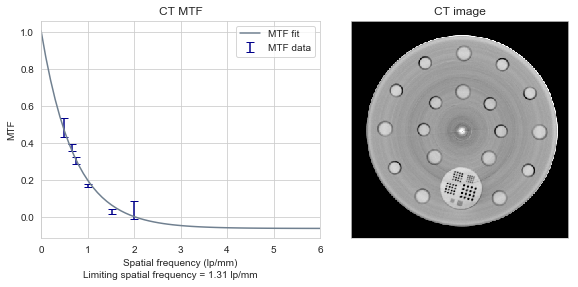

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\AAPM21\CT Resolution\Two'
data = np.load(directory + r'\CT_mtf_data_2.npy')
fit = np.load(directory + r'\CT_mtf_fit_2.npy')
ct = np.load(directory + r'\CT_norm_2.npy')

# Find limit
idx = np.abs(fit[1] - 0.1).argmin()
ct_lim = fit[0][idx]

fig2, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].errorbar(data[0], data[1], yerr=data[2]*2, capsize=4, fmt='none', color='darkblue')
ax[0].plot(fit[0], fit[1], color='slategray')
ax[0].set_title('CT MTF')
ax[0].set_ylabel('MTF')
ax[0].set_xlabel('Spatial frequency (lp/mm)')
ax[0].set_xlim([0, 6])
ax[0].legend(['MTF fit', 'MTF data'])
ax[0].annotate(f'Limiting spatial frequency = {ct_lim:0.2f} lp/mm', (0.15, -0.17),
               xycoords='axes fraction', va='center')

ax[1].imshow(ct[13, 120:450, 120:450], vmin=-800, vmax=200, cmap='gray')
ax[1].axes.xaxis.set_ticks([])
ax[1].axes.yaxis.set_ticks([])
ax[1].grid(False)
ax[1].set_title('CT image')
plt.subplots_adjust(wspace=0)
plt.show()

AttributeError: 'list' object has no attribute 'xaxis'

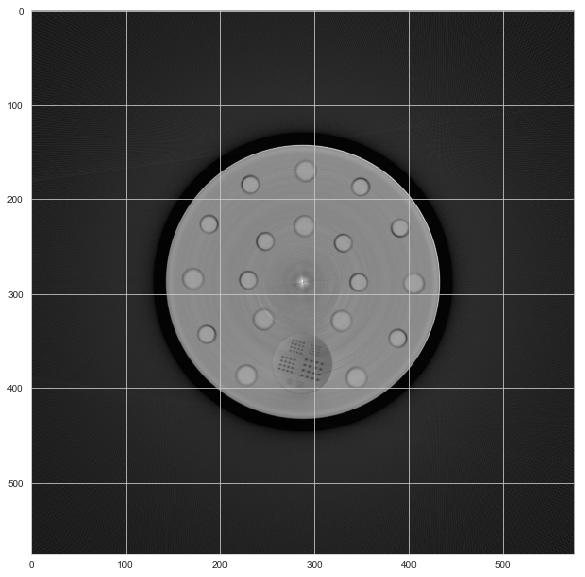